In [1]:
import math

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def plot_images(images, cols=3):
    num_images = len(images)
    rows = math.ceil(float(num_images) / cols)
    
    fig = plt.figure(figsize=(16, 4*rows))
    
    for idx in range(num_images):
        img = mpimg.imread(images[idx])
        fig.add_subplot(rows, cols, idx+1)
        plt.axis('off')
        plt.imshow(img, aspect=0.75)
    
    plt.subplots_adjust(wspace=0, hspace=0)

In [3]:
def plot_serengeti_images(dataframe,
                          serengeti_base_path = '/data/fagner/coruja/datasets/serengeti/serengeti_600x1024/'):
    
    images = [serengeti_base_path + image_path for image_path in list(dataframe['image_path_rel'])]
    plot_images(images)

In [4]:
def plot_caltech_images(dataframe,
                        caltech_base_path = '/data/fagner/coruja/datasets/caltech/cct_images_resized/'):
    
    images = [caltech_base_path + image_path for image_path in list(dataframe['file_name'])]
    plot_images(images)

#### Loading metadata

In [5]:
with open('../data/SnapshotSerengetiSplits_v0.json') as json_file:
    recommend_train_val_splits = json.load(json_file)

serengeti_annotations = pd.read_csv('../data/SnapshotSerengeti_v2_1_annotations.csv')
serengeti_annotations = serengeti_annotations[['capture_id', 'season', 'site', 'question__species']].copy()
serengeti_images = pd.read_csv('../data/SnapshotSerengeti_v2_1_images.csv')
serengeti_images = serengeti_images.drop('Unnamed: 0', axis=1)
serengeti_images_labeled = pd.merge(serengeti_images, serengeti_annotations, on='capture_id', how='outer')

/home/fagner/anaconda3/envs/cameratraps-detector/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
serengeti_images_labeled = serengeti_images_labeled[
    serengeti_images_labeled.season.isin(['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])].copy()

In [7]:
with open('../data/CaltechCameraTrapsSplits_v0.json') as json_file:
    recommend_train_val_splits = json.load(json_file)
with open('../data/caltech_images_20200316.json') as json_file:
    cct_metadata = json.load(json_file)
cct_images = pd.DataFrame(cct_metadata['images'])
cct_annotations = pd.DataFrame(cct_metadata['annotations'])

cct_images_labeled = pd.merge(cct_images,
                              cct_annotations,
                              how='outer',
                              left_on='id',
                              right_on='image_id')
cct_images_labeled['file_name'] = cct_images_labeled['file_name'].str.replace("train_val/", "")
cct_images_labeled['file_name'] = cct_images_labeled['file_name'].str.replace("test/", "")

In [8]:
cct_images_labeled.head()

seq_num_frames        date_captured                                seq_id  \
0               1  2013-10-04 13:31:53  6f2160eb-5567-11e8-990e-dca9047ef277   
1               1  2013-11-04 18:37:07  6f27ed66-5567-11e8-9e92-dca9047ef277   
2               3  2012-05-09 07:33:45  6f04895c-5567-11e8-a3d6-dca9047ef277   
3               3  2012-03-29 02:34:13  6f0385b5-5567-11e8-a80b-dca9047ef277   
4               3  2012-05-08 19:23:36  6f0a3ccf-5567-11e8-92fb-dca9047ef277   

   height  width location  rights_holder  \
0    1494   2048       26  Erin Boydston   
1    1494   2048       26  Erin Boydston   
2    1494   2048       38   Justin Brown   
3    1494   2048       38   Justin Brown   
4    1494   2048       33   Justin Brown   

                                  file_name  \
0  5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg   
1  5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg   
2  59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg   
3  59641f56-23d2-11e8-a6a3-ec086b02610b.jpg   
4  5a1e5306-23d2-11e8-a6a3-ec086b02610b.jpg   

                                   id_x  frame_num  \
0  5968c0f9-23d2-11e8-a6a3-ec086b02610b          1   
1  5a0b016f-23d2-11e8-a6a3-ec086b02610b          1   
2  59b93afb-23d2-11e8-a6a3-ec086b02610b          2   
3  59641f56-23d2-11e8-a6a3-ec086b02610b          2   
4  5a1e5306-23d2-11e8-a6a3-ec086b02610b          2   

                                   id_y  category_id  \
0  e6eb96aa-7d66-11e7-884d-7845c41c2c67           30   
1  38bd1ea8-7d68-11e7-884d-7845c41c2c67           34   
2                                 38243           16   
3                                 24844            1   
4  a31c47cc-7d5b-11e7-884d-7845c41c2c67           30   

                               image_id  
0  5968c0f9-23d2-11e8-a6a3-ec086b02610b  
1  5a0b016f-23d2-11e8-a6a3-ec086b02610b  
2  59b93afb-23d2-11e8-a6a3-ec086b02610b  
3  59641f56-23d2-11e8-a6a3-ec086b02610b  
4  5a1e5306-23d2-11e8-a6a3-ec086b02610b

In [9]:
serengeti_images_labeled.head()

capture_id  image_rank_in_capture  \
0  SER_S1#B04#1#1                      1   
1  SER_S1#B04#1#2                      1   
2  SER_S1#B04#1#3                      1   
3  SER_S1#B04#1#4                      1   
4  SER_S1#B04#1#5                      1   

                         image_path_rel season site question__species  
0  S1/B04/B04_R1/S1_B04_R1_PICT0001.JPG     S1  B04             human  
1  S1/B04/B04_R1/S1_B04_R1_PICT0002.JPG     S1  B04             human  
2  S1/B04/B04_R1/S1_B04_R1_PICT0003.JPG     S1  B04             blank  
3  S1/B04/B04_R1/S1_B04_R1_PICT0004.JPG     S1  B04             blank  
4  S1/B04/B04_R1/S1_B04_R1_PICT0005.JPG     S1  B04             blank

### Images from same capture event are very similar

In [10]:
images = serengeti_images_labeled[serengeti_images_labeled.capture_id == 'SER_S3#U10#11#59']
images

capture_id  image_rank_in_capture  \
1391988  SER_S3#U10#11#59                      1   
1391989  SER_S3#U10#11#59                      2   
1391990  SER_S3#U10#11#59                      3   

                                 image_path_rel season site question__species  
1391988  S3/U10/U10_R11/S3_U10_R11_IMAG0155.JPG     S3  U10           buffalo  
1391989  S3/U10/U10_R11/S3_U10_R11_IMAG0156.JPG     S3  U10           buffalo  
1391990  S3/U10/U10_R11/S3_U10_R11_IMAG0157.JPG     S3  U10           buffalo

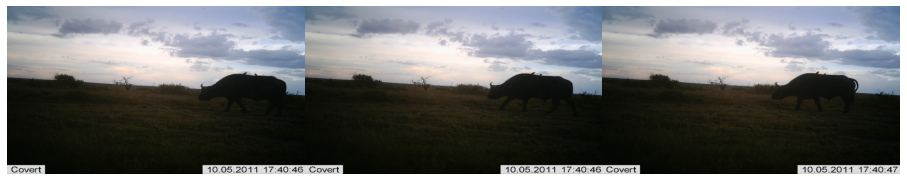

In [11]:
plot_serengeti_images(images)

In [12]:
images = serengeti_images_labeled[serengeti_images_labeled.capture_id == 'SER_S1#F11#1#184']
images

capture_id  image_rank_in_capture  \
114052  SER_S1#F11#1#184                      1   
114053  SER_S1#F11#1#184                      2   
114054  SER_S1#F11#1#184                      3   

                              image_path_rel season site question__species  
114052  S1/F11/F11_R1/S1_F11_R1_PICT0548.JPG     S1  F11             blank  
114053  S1/F11/F11_R1/S1_F11_R1_PICT0549.JPG     S1  F11             blank  
114054  S1/F11/F11_R1/S1_F11_R1_PICT0550.JPG     S1  F11             blank

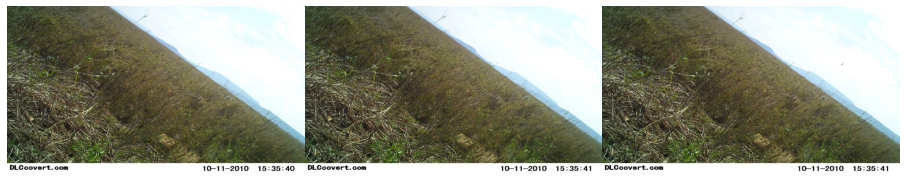

In [13]:
plot_serengeti_images(images)

### Images are taken with static cameras (fixed locations)

In [14]:
serengeti_images_labeled.site.unique()

array(['B04', 'B05', 'B06', 'B07', 'C03', 'C04', 'C05', 'C06', 'C07',
       'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D11',
       'D12', 'D13', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07',
       'E08', 'E09', 'E10', 'E11', 'E12', 'E13', 'F02', 'F03', 'F04',
       'F05', 'F06', 'F08', 'F09', 'F10', 'F11', 'F12', 'G01', 'G02',
       'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11',
       'G12', 'G13', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07',
       'H08', 'H09', 'H10', 'H11', 'H13', 'I02', 'I03', 'I04', 'I05',
       'I06', 'I07', 'I08', 'I09', 'I11', 'I12', 'I13', 'J03', 'J04',
       'J05', 'J06', 'J07', 'J08', 'J09', 'J10', 'J11', 'J12', 'J13',
       'K03', 'K04', 'K05', 'K06', 'K07', 'K08', 'K09', 'K10', 'K11',
       'K12', 'K13', 'L03', 'L04', 'L05', 'L06', 'L07', 'L08', 'L10',
       'L12', 'L13', 'M04', 'M05', 'M07', 'M08', 'M09', 'M10', 'M11',
       'M12', 'M13', 'N04', 'N05', 'N06', 'N08', 'N10', 'N11', 'N12',
       'O05', 'O06',

In [15]:
images = serengeti_images_labeled[serengeti_images_labeled.site == 'U10'].sample(6)
images

capture_id  image_rank_in_capture  \
1393040   SER_S3#U10#12#25                      1   
1392226  SER_S3#U10#11#145                      1   
2760310   SER_S5#U10#2#308                      3   
1922399   SER_S4#U10#3#123                      3   
2763165   SER_S5#U10#4#484                      3   
1921304   SER_S4#U10#1#261                      1   

                                 image_path_rel season site question__species  
1393040  S3/U10/U10_R12/S3_U10_R12_IMAG0067.JPG     S3  U10        wildebeest  
1392226  S3/U10/U10_R11/S3_U10_R11_IMAG0393.JPG     S3  U10        hartebeest  
2760310    S5/U10/U10_R2/S5_U10_R2_IMAG0890.JPG     S5  U10             blank  
1922399    S4/U10/U10_R3/S4_U10_R3_IMAG0277.JPG     S4  U10           buffalo  
2763165    S5/U10/U10_R4/S5_U10_R4_IMAG1432.JPG     S5  U10        wildebeest  
1921304    S4/U10/U10_R1/S4_U10_R1_IMAG0607.JPG     S4  U10             blank

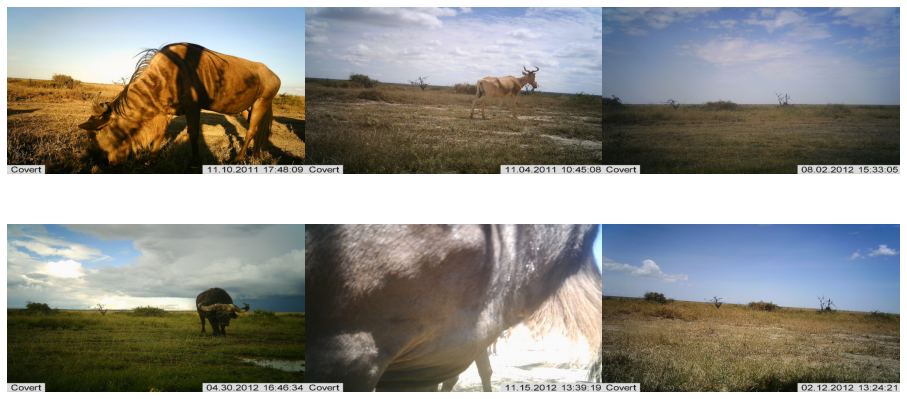

In [16]:
plot_serengeti_images(images)

In [17]:
images = serengeti_images_labeled[serengeti_images_labeled.site == 'H11'].sample(6)
images

capture_id  image_rank_in_capture  \
2296619    SER_S5#H11#2#55                      3   
177200    SER_S1#H11#1#452                      1   
181783   SER_S1#H11#1#1979                      3   
182026   SER_S1#H11#1#2060                      3   
175935     SER_S1#H11#1#30                      2   
181454   SER_S1#H11#1#1870                      1   

                               image_path_rel season site question__species  
2296619  S5/H11/H11_R2/S5_H11_R2_IMAG0119.JPG     S5  H11             blank  
177200   S1/H11/H11_R1/S1_H11_R1_PICT1352.JPG     S1  H11             blank  
181783   S1/H11/H11_R1/S1_H11_R1_PICT5935.JPG     S1  H11             blank  
182026   S1/H11/H11_R1/S1_H11_R1_PICT6178.JPG     S1  H11             blank  
175935   S1/H11/H11_R1/S1_H11_R1_PICT0087.JPG     S1  H11             blank  
181454   S1/H11/H11_R1/S1_H11_R1_PICT5606.JPG     S1  H11             blank

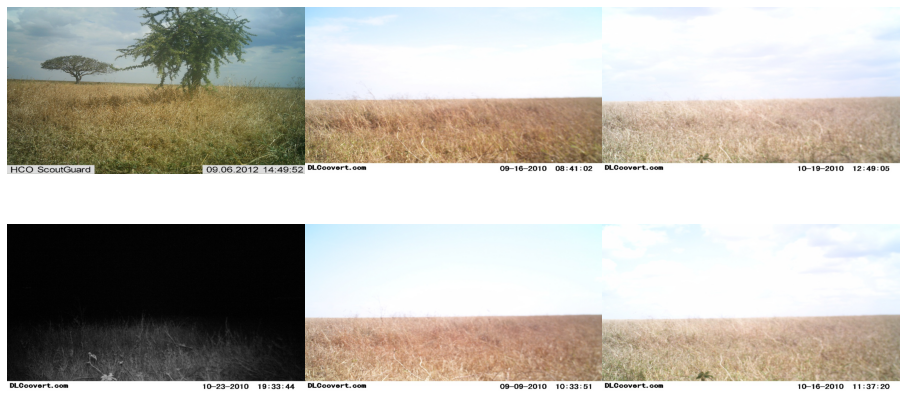

In [18]:
plot_serengeti_images(images)

In [19]:
cct_images_labeled.location.unique()

array(['26', '38', '33', '36', '61', '41', '57', '53', '23', '46', '15',
       '5', '44', '0', '27', '6', '40', '59', '7', '16', '45', '3', '10',
       '51', '56', '43', '24', '58', '22', '20', '13', '34', '60', '64',
       '62', '29', '1', '39', '63', '25', '19', '37', '18', '28', '4',
       '14', '35', '9', '17', '48', '11', '42', '31', '12', '55', '30',
       '32', '54', '2', '21', '50', '8', '49', '52', '47', '70', '67',
       '72', '66', '65', '71', '68', '69', '73', '74', '76', '130', '78',
       '96', '93', '115', '88', '112', '120', '114', '106', '75', '100',
       '134', '136', '111', '117', '105', '108', '95', '86', '101', '97',
       '87', '90', '135', '126', '103', '104', '109', '84', '83', '131',
       '125', '81', '94', '137', '121', '107', '116', '85', '82', '123',
       '92', '98', '127', '102', '89', '99', '118', '128', '110', '80',
       '138', '79', '133', '77', '129', '119', '124', '122', '113', '91',
       '132', '139'], dtype=object)

In [20]:
images = cct_images_labeled[cct_images_labeled.location == '86'].sample(6)
images

seq_num_frames        date_captured  \
170262               3  2014-12-18 09:01:14   
126452               3  2014-03-14 13:39:22   
235403               3  2015-01-02 09:46:20   
237049               3  2014-12-19 09:34:03   
181374               3  2014-12-07 04:15:12   
238392               3  2015-01-11 10:19:15   

                                      seq_id  height  width location  \
170262  7019a051-5567-11e8-aa0b-dca9047ef277    1494   2048       86   
126452  701990b0-5567-11e8-8fa2-dca9047ef277    1494   2048       86   
235403  7019b15c-5567-11e8-82cf-dca9047ef277    1494   2048       86   
237049  7019a3e1-5567-11e8-b66c-dca9047ef277    1494   2048       86   
181374  70199a9e-5567-11e8-afa0-dca9047ef277    1494   2048       86   
238392  7019b342-5567-11e8-8ad8-dca9047ef277    1494   2048       86   

       rights_holder                                 file_name  \
170262  Justin Brown  58b9d5ea-23d2-11e8-a6a3-ec086b02610b.jpg   
126452  Justin Brown  58782a28-23d2-11e8-a6a3-ec086b02610b.jpg   
235403  Justin Brown  58d2ea29-23d2-11e8-a6a3-ec086b02610b.jpg   
237049  Justin Brown  5908802c-23d2-11e8-a6a3-ec086b02610b.jpg   
181374  Justin Brown  58e40f5d-23d2-11e8-a6a3-ec086b02610b.jpg   
238392  Justin Brown  58960b03-23d2-11e8-a6a3-ec086b02610b.jpg   

                                        id_x  frame_num  \
170262  58b9d5ea-23d2-11e8-a6a3-ec086b02610b          3   
126452  58782a28-23d2-11e8-a6a3-ec086b02610b          3   
235403  58d2ea29-23d2-11e8-a6a3-ec086b02610b          2   
237049  5908802c-23d2-11e8-a6a3-ec086b02610b          2   
181374  58e40f5d-23d2-11e8-a6a3-ec086b02610b          2   
238392  58960b03-23d2-11e8-a6a3-ec086b02610b          1   

                                        id_y  category_id  \
170262  2c2cb620-7de9-11e7-884d-7845c41c2c67           11   
126452  29c9d9fe-7de9-11e7-884d-7845c41c2c67           11   
235403  2e8f4789-7de9-11e7-884d-7845c41c2c67           11   
237049  2d5e58b0-7de9-11e7-884d-7845c41c2c67           11   
181374  2d5e58ee-7de9-11e7-884d-7845c41c2c67           99   
238392  2d5e5898-7de9-11e7-884d-7845c41c2c67           11   

                                    image_id  
170262  58b9d5ea-23d2-11e8-a6a3-ec086b02610b  
126452  58782a28-23d2-11e8-a6a3-ec086b02610b  
235403  58d2ea29-23d2-11e8-a6a3-ec086b02610b  
237049  5908802c-23d2-11e8-a6a3-ec086b02610b  
181374  58e40f5d-23d2-11e8-a6a3-ec086b02610b  
238392  58960b03-23d2-11e8-a6a3-ec086b02610b

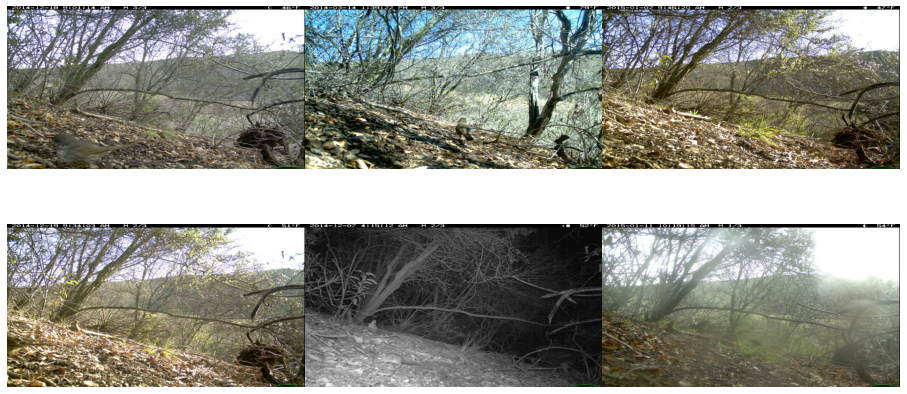

In [21]:
plot_caltech_images(images)

In [22]:
images = cct_images_labeled[cct_images_labeled.location == '63'].sample(6)
images

seq_num_frames        date_captured  \
91691                3  2015-05-18 01:36:45   
106000               3  2015-04-24 02:55:21   
13933                3  2013-11-23 17:15:52   
25497                3  2013-11-13 11:12:42   
92005                3  2014-02-21 19:49:11   
31975                3  2015-05-12 19:35:21   

                                      seq_id  height  width location  \
91691   70176a42-5567-11e8-9193-dca9047ef277    1494   2048       63   
106000  7017658a-5567-11e8-a023-dca9047ef277    1494   2048       63   
13933   70175b1c-5567-11e8-ab79-dca9047ef277    1494   2048       63   
25497   701758b0-5567-11e8-910b-dca9047ef277    1494   2048       63   
92005   70176499-5567-11e8-ba22-dca9047ef277    1494   2048       63   
31975   701766b8-5567-11e8-95dc-dca9047ef277    1494   2048       63   

       rights_holder                                 file_name  \
91691   Justin Brown  59a17b87-23d2-11e8-a6a3-ec086b02610b.jpg   
106000  Justin Brown  59df5ebf-23d2-11e8-a6a3-ec086b02610b.jpg   
13933   Justin Brown  5978304d-23d2-11e8-a6a3-ec086b02610b.jpg   
25497   Justin Brown  59c80341-23d2-11e8-a6a3-ec086b02610b.jpg   
92005   Justin Brown  5a164188-23d2-11e8-a6a3-ec086b02610b.jpg   
31975   Justin Brown  598ace9b-23d2-11e8-a6a3-ec086b02610b.jpg   

                                        id_x  frame_num  \
91691   59a17b87-23d2-11e8-a6a3-ec086b02610b          1   
106000  59df5ebf-23d2-11e8-a6a3-ec086b02610b          1   
13933   5978304d-23d2-11e8-a6a3-ec086b02610b          2   
25497   59c80341-23d2-11e8-a6a3-ec086b02610b          1   
92005   5a164188-23d2-11e8-a6a3-ec086b02610b          1   
31975   598ace9b-23d2-11e8-a6a3-ec086b02610b          2   

                                        id_y  category_id  \
91691   f1c282a3-7de8-11e7-884d-7845c41c2c67            9   
106000  f1c282c3-7de8-11e7-884d-7845c41c2c67           99   
13933   f1c28337-7de8-11e7-884d-7845c41c2c67           34   
25497   f2f65f21-7de8-11e7-884d-7845c41c2c67           34   
92005   f0917dfb-7de8-11e7-884d-7845c41c2c67           34   
31975   f1c282ad-7de8-11e7-884d-7845c41c2c67           34   

                                    image_id  
91691   59a17b87-23d2-11e8-a6a3-ec086b02610b  
106000  59df5ebf-23d2-11e8-a6a3-ec086b02610b  
13933   5978304d-23d2-11e8-a6a3-ec086b02610b  
25497   59c80341-23d2-11e8-a6a3-ec086b02610b  
92005   5a164188-23d2-11e8-a6a3-ec086b02610b  
31975   598ace9b-23d2-11e8-a6a3-ec086b02610b

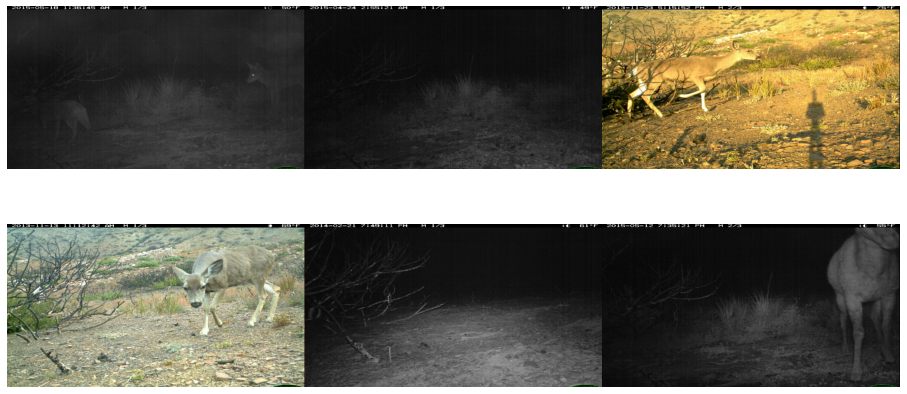

In [23]:
plot_caltech_images(images)

In [24]:
images = serengeti_images_labeled[(serengeti_images_labeled.site == 'Q06')
                                  &(serengeti_images_labeled.question__species== 'blank')].sample(6)
images

capture_id  image_rank_in_capture  \
1347078  SER_S3#Q06#12#381                      2   
1346361  SER_S3#Q06#12#117                      2   
1347247  SER_S3#Q06#12#439                      3   
1346655  SER_S3#Q06#12#234                      1   
1346569  SER_S3#Q06#12#203                      2   
1346560  SER_S3#Q06#12#200                      2   

                                 image_path_rel season site question__species  
1347078  S3/Q06/Q06_R12/S3_Q06_R12_IMAG1048.JPG     S3  Q06             blank  
1346361  S3/Q06/Q06_R12/S3_Q06_R12_IMAG0334.JPG     S3  Q06             blank  
1347247  S3/Q06/Q06_R12/S3_Q06_R12_IMAG1217.JPG     S3  Q06             blank  
1346655  S3/Q06/Q06_R12/S3_Q06_R12_IMAG0628.JPG     S3  Q06             blank  
1346569  S3/Q06/Q06_R12/S3_Q06_R12_IMAG0542.JPG     S3  Q06             blank  
1346560  S3/Q06/Q06_R12/S3_Q06_R12_IMAG0533.JPG     S3  Q06             blank

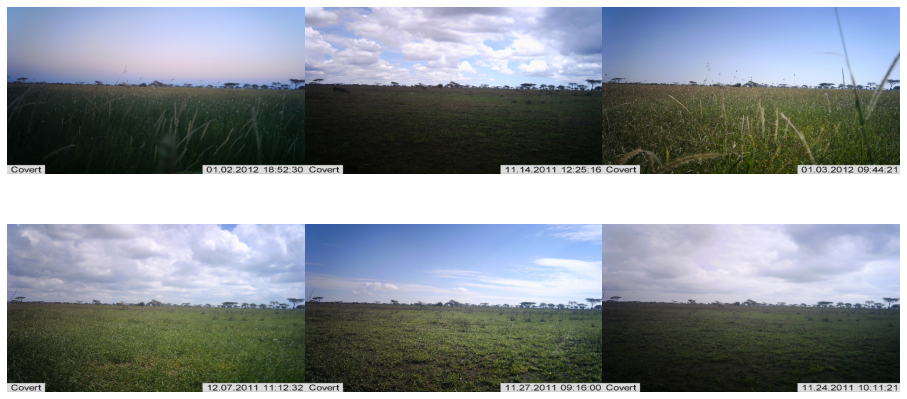

In [25]:
plot_serengeti_images(images)

In [26]:
images = serengeti_images_labeled[(serengeti_images_labeled.site == 'E09')
                                  &(serengeti_images_labeled.question__species== 'blank')].sample(6)
images

capture_id  image_rank_in_capture  \
2880394  SER_S6#E09#2#516                      2   
2147655  SER_S5#E09#2#165                      3   
2149923  SER_S5#E09#3#330                      1   
2148935  SER_S5#E09#2#596                      2   
2878896   SER_S6#E09#2#11                      3   
2147650  SER_S5#E09#2#164                      1   

                               image_path_rel season site question__species  
2880394  S6/E09/E09_R2/S6_E09_R2_IMAG1527.JPG     S6  E09             blank  
2147655  S5/E09/E09_R2/S5_E09_R2_IMAG0495.JPG     S5  E09             blank  
2149923  S5/E09/E09_R3/S5_E09_R3_IMAG0986.JPG     S5  E09             blank  
2148935  S5/E09/E09_R2/S5_E09_R2_IMAG1775.JPG     S5  E09             blank  
2878896  S6/E09/E09_R2/S6_E09_R2_IMAG0029.JPG     S6  E09             blank  
2147650  S5/E09/E09_R2/S5_E09_R2_IMAG0490.JPG     S5  E09             blank

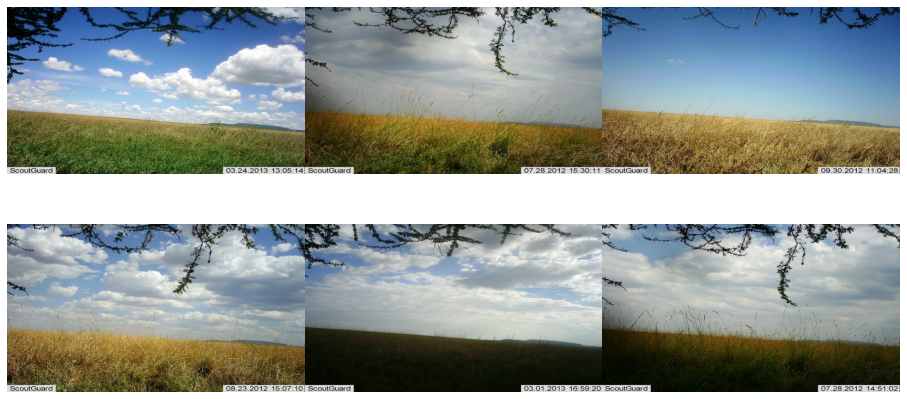

In [27]:
plot_serengeti_images(images)

In [28]:
images = cct_images_labeled[(cct_images_labeled.location == '40')
                           &(cct_images_labeled.category_id == 30)].sample(6)
images

seq_num_frames        date_captured  \
27572               5  2011-12-29 09:01:43   
94021               3  2011-05-22 23:33:29   
31874               5  2011-12-08 19:37:11   
66461               5  2012-03-29 14:20:04   
5225                3  2011-08-21 03:41:24   
8899                5  2012-05-02 23:17:37   

                                     seq_id  height  width location  \
27572  6f062d02-5567-11e8-83e8-dca9047ef277    1494   2048       40   
94021  6f05d897-5567-11e8-830b-dca9047ef277    1494   2048       40   
31874  6f062b35-5567-11e8-8f0f-dca9047ef277    1494   2048       40   
66461  6f06370c-5567-11e8-bddc-dca9047ef277    1494   2048       40   
5225   6f05fec2-5567-11e8-9654-dca9047ef277    1494   2048       40   
8899   6f0644a3-5567-11e8-a778-dca9047ef277    1494   2048       40   

      rights_holder                                 file_name  \
27572  Justin Brown  598acd69-23d2-11e8-a6a3-ec086b02610b.jpg   
94021  Justin Brown  59b2eb6c-23d2-11e8-a6a3-ec086b02610b.jpg   
31874  Justin Brown  59973f6d-23d2-11e8-a6a3-ec086b02610b.jpg   
66461  Justin Brown  59973ea4-23d2-11e8-a6a3-ec086b02610b.jpg   
5225   Justin Brown  59f12998-23d2-11e8-a6a3-ec086b02610b.jpg   
8899   Justin Brown  59fe2190-23d2-11e8-a6a3-ec086b02610b.jpg   

                                       id_x  frame_num  \
27572  598acd69-23d2-11e8-a6a3-ec086b02610b          3   
94021  59b2eb6c-23d2-11e8-a6a3-ec086b02610b          3   
31874  59973f6d-23d2-11e8-a6a3-ec086b02610b          2   
66461  59973ea4-23d2-11e8-a6a3-ec086b02610b          5   
5225   59f12998-23d2-11e8-a6a3-ec086b02610b          1   
8899   59fe2190-23d2-11e8-a6a3-ec086b02610b          1   

                                       id_y  category_id  \
27572  7a935a01-7d5b-11e7-884d-7845c41c2c67           30   
94021  7f590c9c-7d5b-11e7-884d-7845c41c2c67           30   
31874  7830f12d-7d5b-11e7-884d-7845c41c2c67           30   
66461  7bc4397d-7d5b-11e7-884d-7845c41c2c67           30   
5225   7961db4f-7d5b-11e7-884d-7845c41c2c67           30   
8899   7a935a4f-7d5b-11e7-884d-7845c41c2c67           30   

                                   image_id  
27572  598acd69-23d2-11e8-a6a3-ec086b02610b  
94021  59b2eb6c-23d2-11e8-a6a3-ec086b02610b  
31874  59973f6d-23d2-11e8-a6a3-ec086b02610b  
66461  59973ea4-23d2-11e8-a6a3-ec086b02610b  
5225   59f12998-23d2-11e8-a6a3-ec086b02610b  
8899   59fe2190-23d2-11e8-a6a3-ec086b02610b

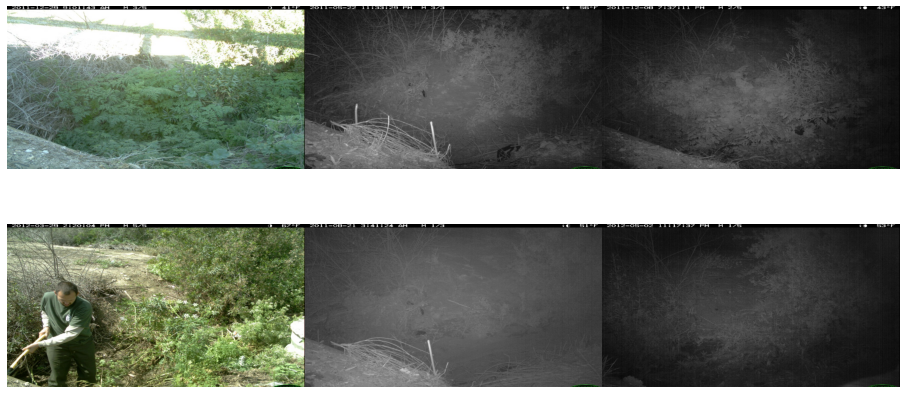

In [29]:
plot_caltech_images(images)